# Data Preparation & Exploration

## Importing the data

In [144]:
import pandas as pd

In [145]:
voice_data = pd.read_csv('data/origin/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [146]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Understanding the data

This dataset includes 3,168 records with 21 variables that measure various acoustic properties of voices and their gender. The variables are as follows:

* `meanfreq`: mean frequency (in kHz)
* `sd`: standard deviation of frequency
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `skew`: skewness
* `kurt`: kurtosis
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `centroid`: frequency centroid
* `meanfun`: average of fundamental frequency measured across acoustic signal
* `minfun`: minimum fundamental frequency measured across acoustic signal
* `maxfun`: maximum fundamental frequency measured across acoustic signal
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `modindx`: modulation index
* `label`: male or female

### Skewness and Kurtosis

Skewness and kurtosis are used to measure the asymmetry and shape of the frequency distribution.

Skewness ($S$) is calculated using the formula:

$$
S = \frac{1}{n - 1}\cdot\frac{\sum_{i=1}^n{\left(x - \overline{x}\right)^3}}{\sigma^3}
$$

where $n$ is the number of observations, $\overline{x}$ is the mean, and $\sigma$ is the standard deviation. A negative skewness value indicates that the spectrum is skewed to the left, a value of 0 indicates a symmetrical spectrum, and a positive value indicates that the spectrum is skewed to the right.

Kurtosis ($K$) is calculated using the formula:

$$
K = \frac{1}{n - 1}\cdot\frac{\sum_{i=1}^n{\left(x - \overline{x}\right)^4}}{\sigma^4}
$$

A value of less than 3 indicates a platykurtic distribution, which has fewer observations in the center and tails than the normal distribution but more in the shoulders. A value of 3 indicates a normal distribution, while a value greater than 3 indicates a leptokurtic distribution, which has more observations in the center and tails and fewer in the shoulders relative to a normal distribution with the same mean and variance.

### Spectral Entropy

The spectral entropy ($H$) of a signal is a measure of its spectral power distribution. It is defined as the Shannon entropy of the signal's power spectrum.

For a signal $X(n)$, let $S(m)=\left|X(m)\right|^2$, then $P(m)=\frac{S(m)}{\sum_{i}S(i)}$. And $H$ is defined as:
$$
H = -\sum_{i=1}^n{P(i)\log_2{P(i)}}
$$

The greater $H$ is, the more uniform the spectrum is.

### Flatness

The spectral flatness is a measure of the spectral shape of a signal. It is defined as the ratio of the geometric mean to the arithmetic mean of the signal's power spectrum:
$$
F = \frac{\sqrt[n]{\prod_{i=1}^n{p_i}}}{\frac{1}{n}\sum_{i=1}^n{p_i}}
$$
where $n$ is the number of frequency bins, $p_i$ is the power in the $i$-th frequency bin, and $F$ is the spectral flatness.

The greater $F$ is, the more flat the spectrum is.

### Frequency Centroid

Centroid is computed according to:
$$
C = \frac{\sum_{i=1}^n{f_i\cdot p_i}}{\sum_{i=1}^n{p_i}}
$$

where $f_i$ is the frequency of the $i$-th frequency bin, and $p_i$ is the power in the $i$-th frequency bin.

### Modulation Index

Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range, which is:
$$
M = \frac{\sum_{i=1}^{n-1}{\left|f_i - f_{i+1}\right|}}{f_{max} - f_{min}}
$$

where $f_i$ is the fundamental frequency of the $i$-th frame, and $f_{max}$ and $f_{min}$ are the maximum and minimum fundamental frequencies in the signal, respectively.

## Data Visualization and Cleaning

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Drop Duplicate Data

According to the definition, we could find that `meanfreq` have the same definition as `centroid`. So we can drop `centroid` to avoid multicollinearity.

In [148]:
assert (voice_data['meanfreq'] == voice_data['centroid']).all()
voice_data.drop('centroid', axis=1, inplace=True)

### Distribution of the target variable

In [149]:
voice_data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

So, if we randomly answer `male` or `female` for each record, we will be correct $50\%$ of the time.

### Distribution of the variables

Here is the overall distribution of the variables.

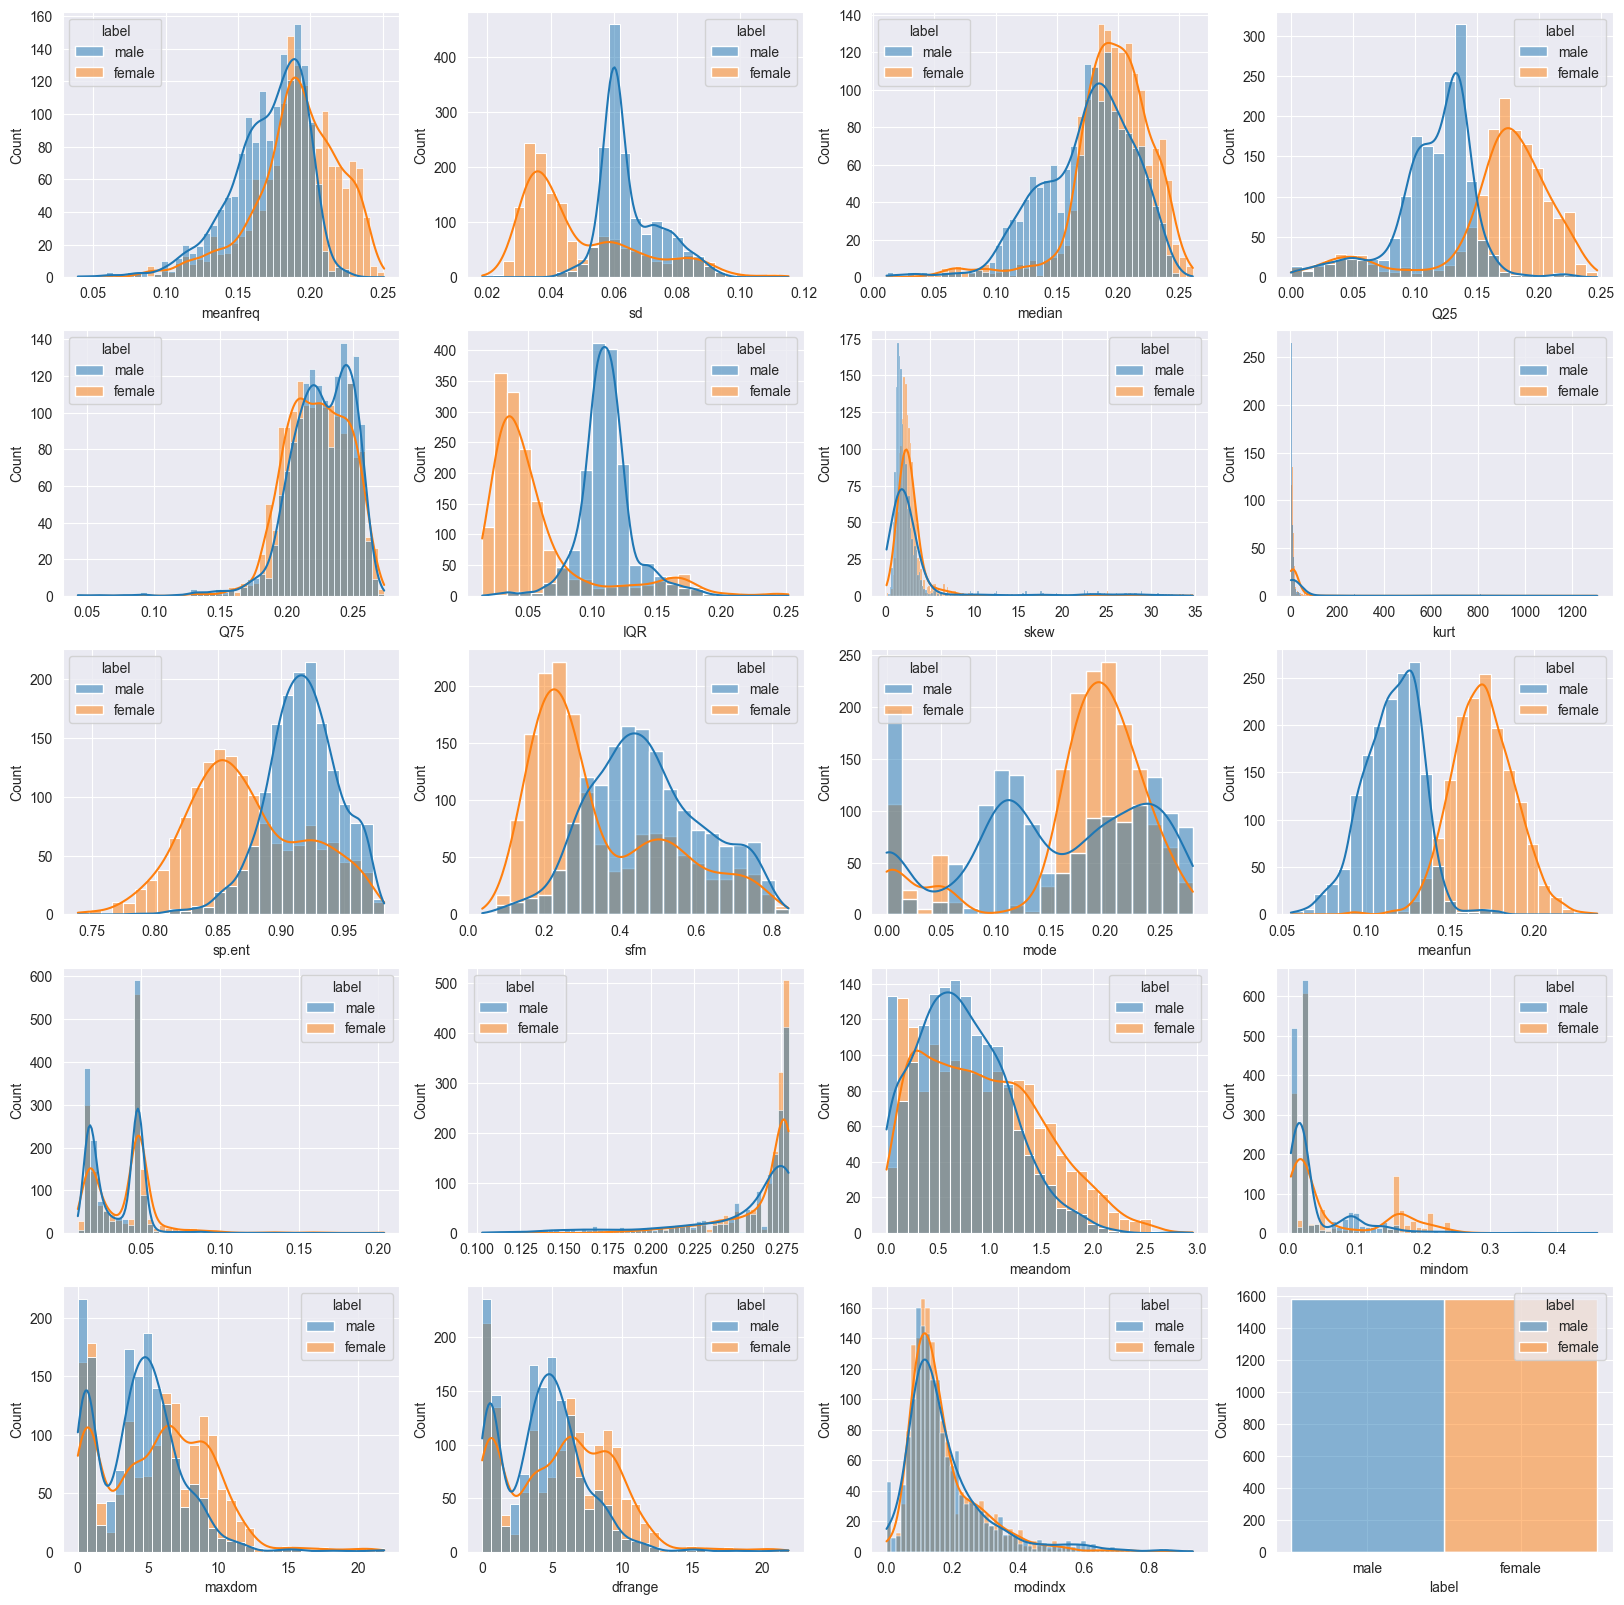

In [150]:
f, axes = plt.subplots(5, 4, figsize=(20, 20))
for i, col in enumerate(voice_data):
    sns.histplot(voice_data, x=col, ax=axes[i // 4, i % 4], kde=True, hue='label')

#### Comparison of the Central Tendency of the Frequency

The central tendency and the spread of the frequency are measured by `meanfreq`, `median`, `Q25` and `Q75`. Let's compare them with `label`.

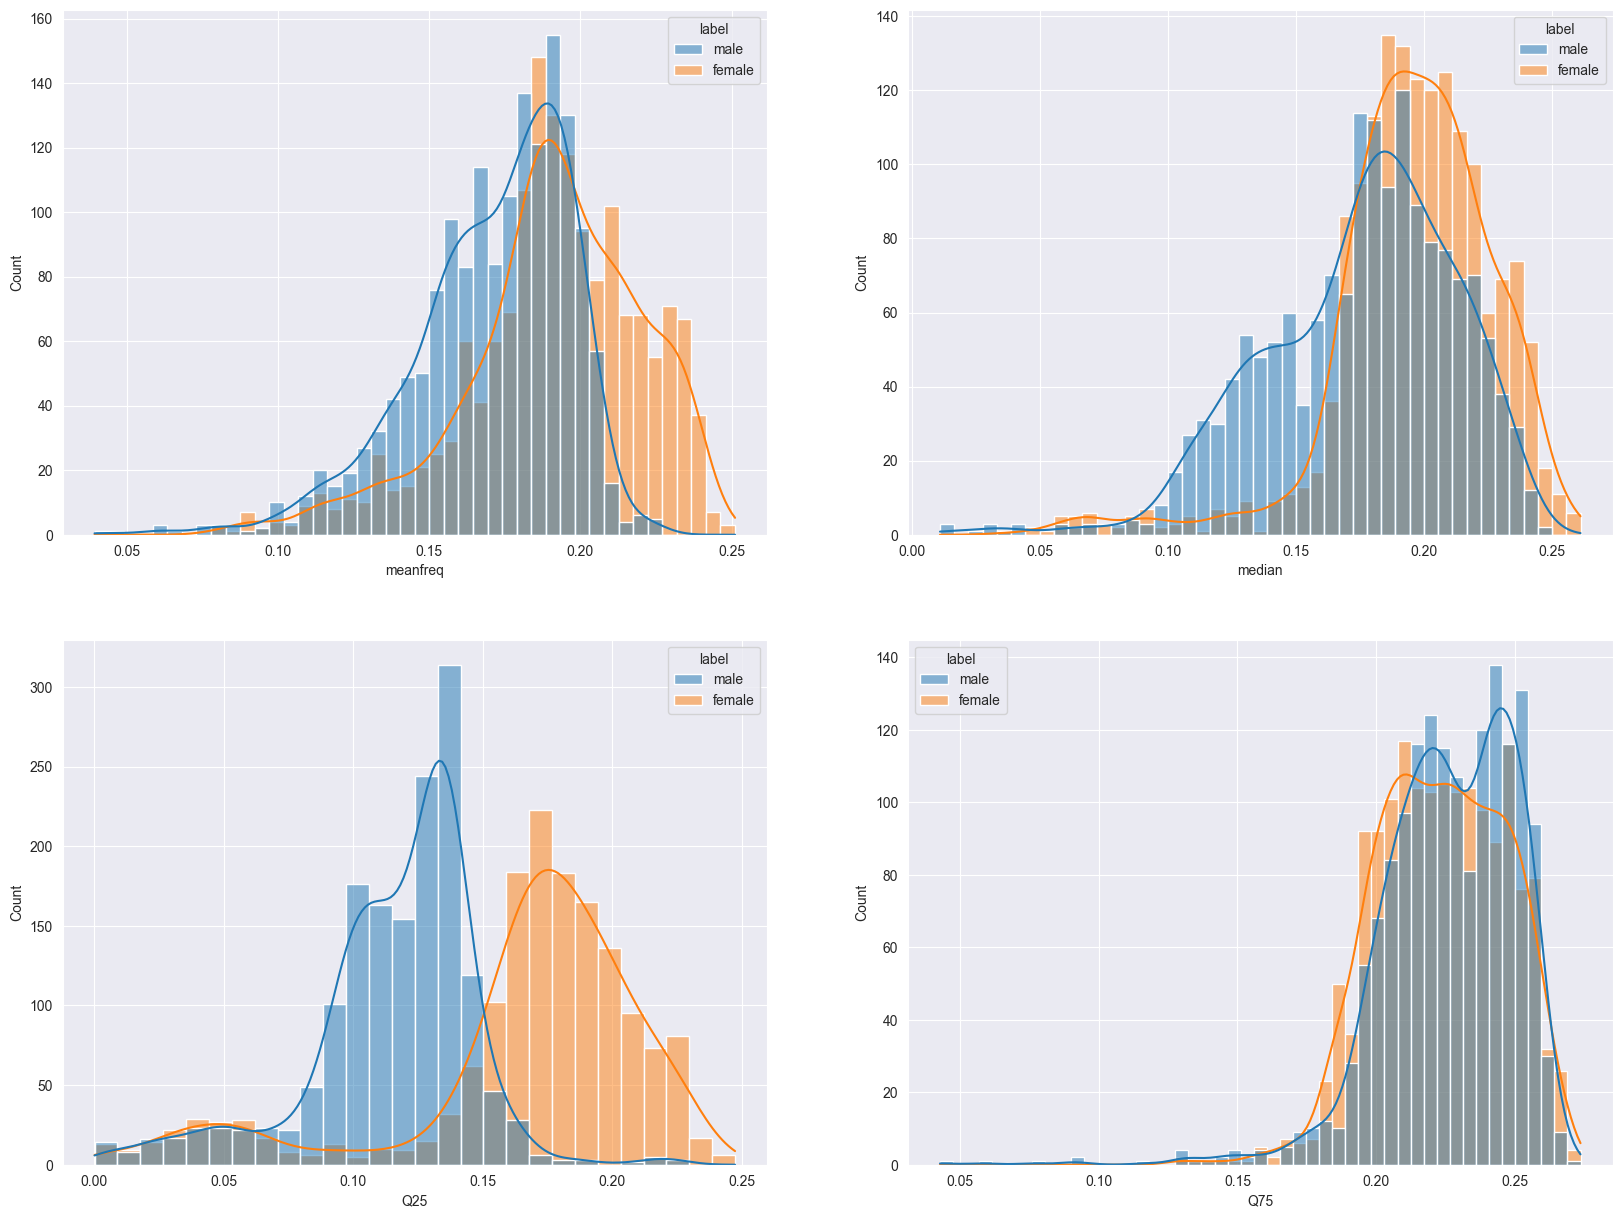

In [151]:
central_cols = ['meanfreq', 'median', 'Q25', 'Q75']
f, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(central_cols):
    sns.histplot(voice_data, x=col, ax=axes[i // 2, i % 2], kde=True, hue='label')

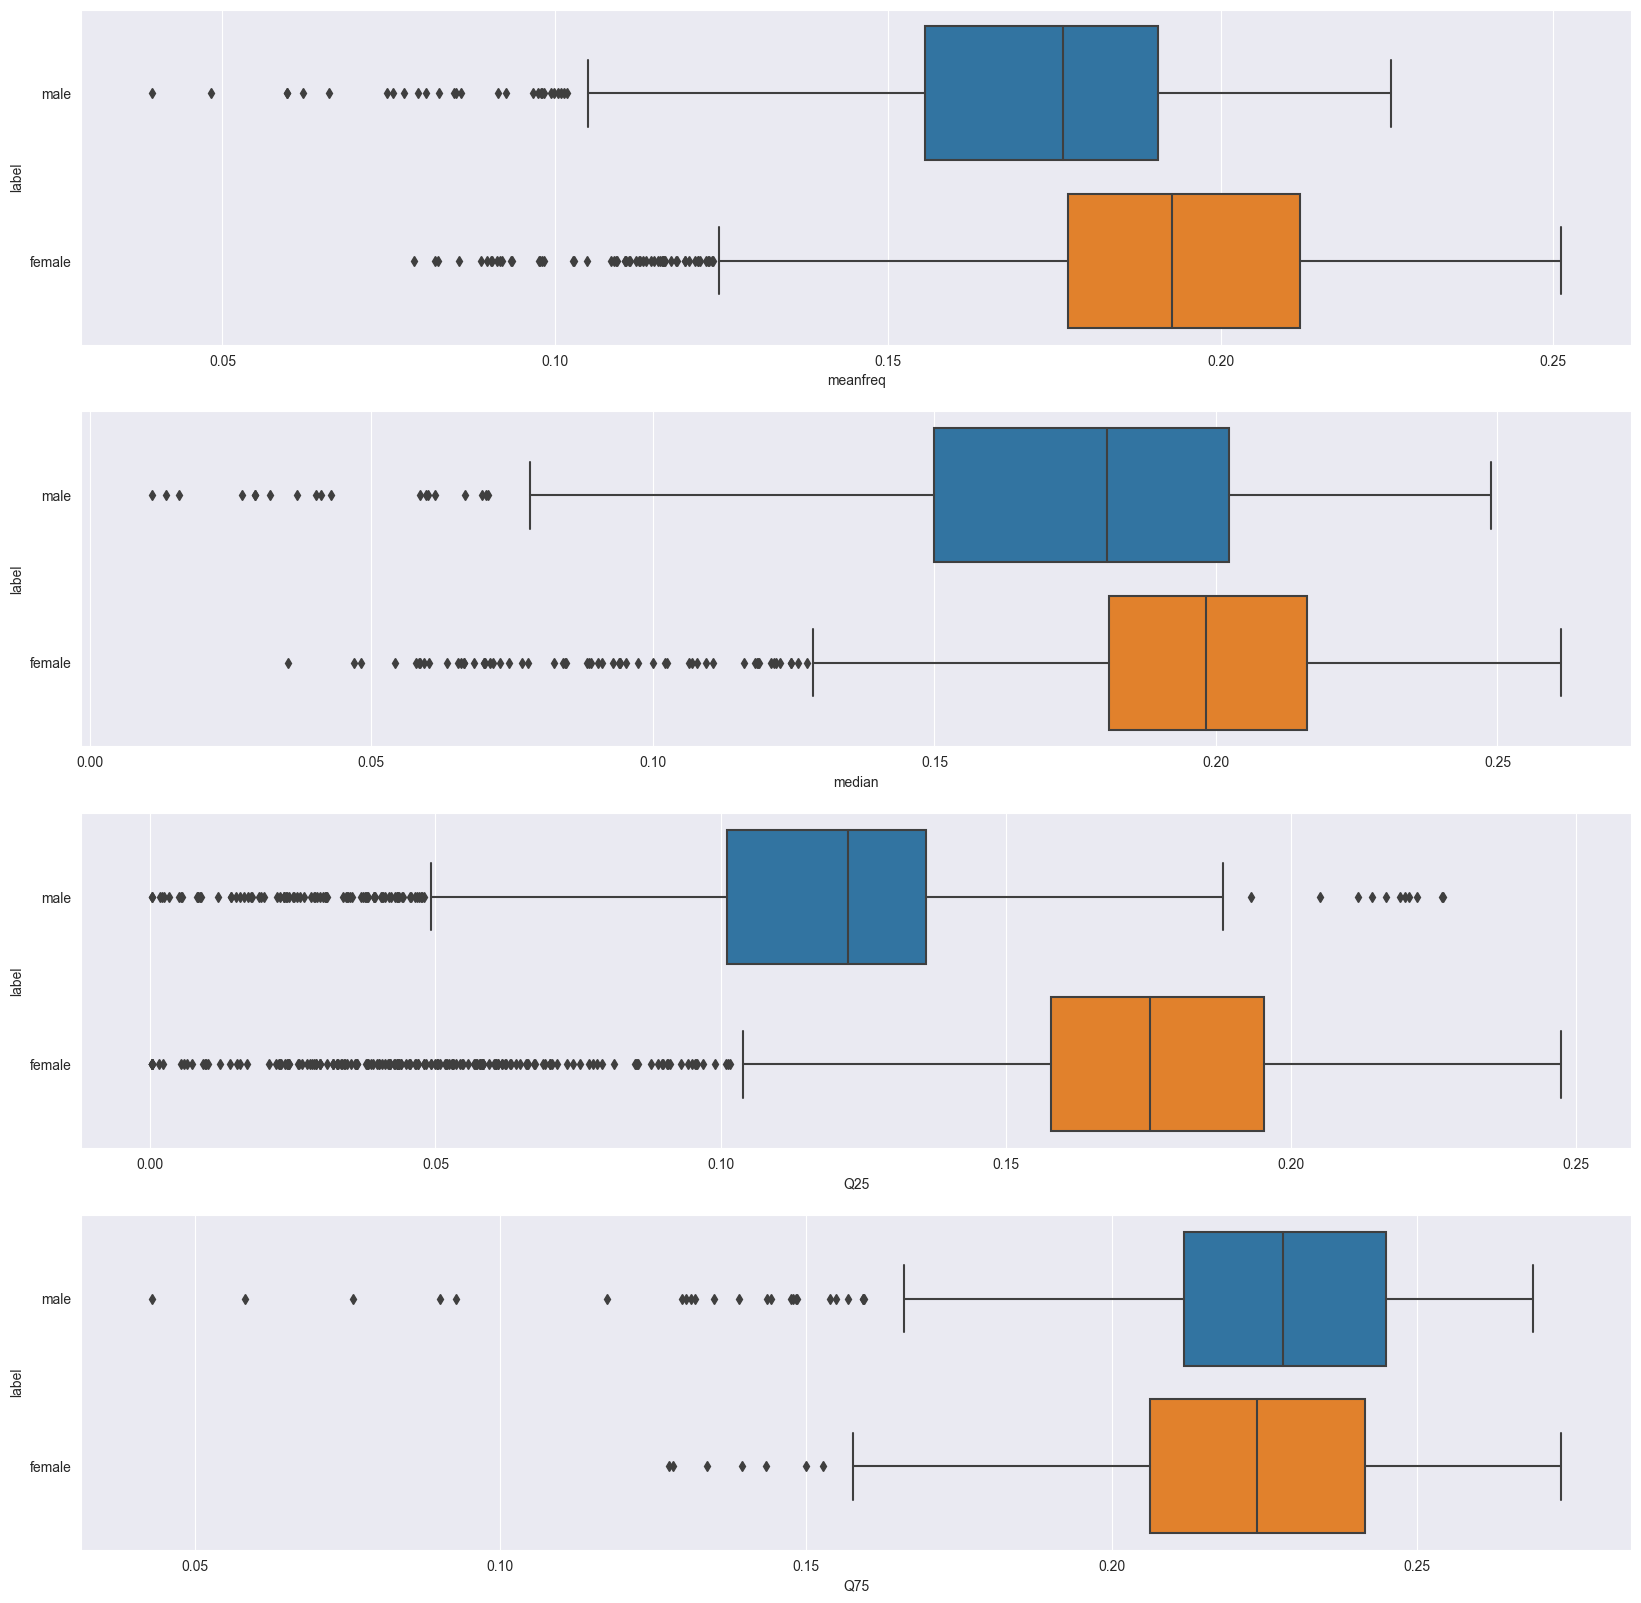

In [152]:
f, axes = plt.subplots(4, 1, figsize=(20, 20))
for i, col in enumerate(central_cols):
    sns.boxplot(x=col, y='label', data=voice_data, ax=axes[i])

We found that `meanfreq`, `median`, `Q75` are mostly the same for both male and female. But `Q25` is different. `Q25` is higher for female than male. So, `Q25` is a good indicator for label.

#### Comparison of the Spread of Frequency

The spread of the frequency are measured by `IQR`, `sd`, `skew`, `kurt`. Let's compare them with `label`.

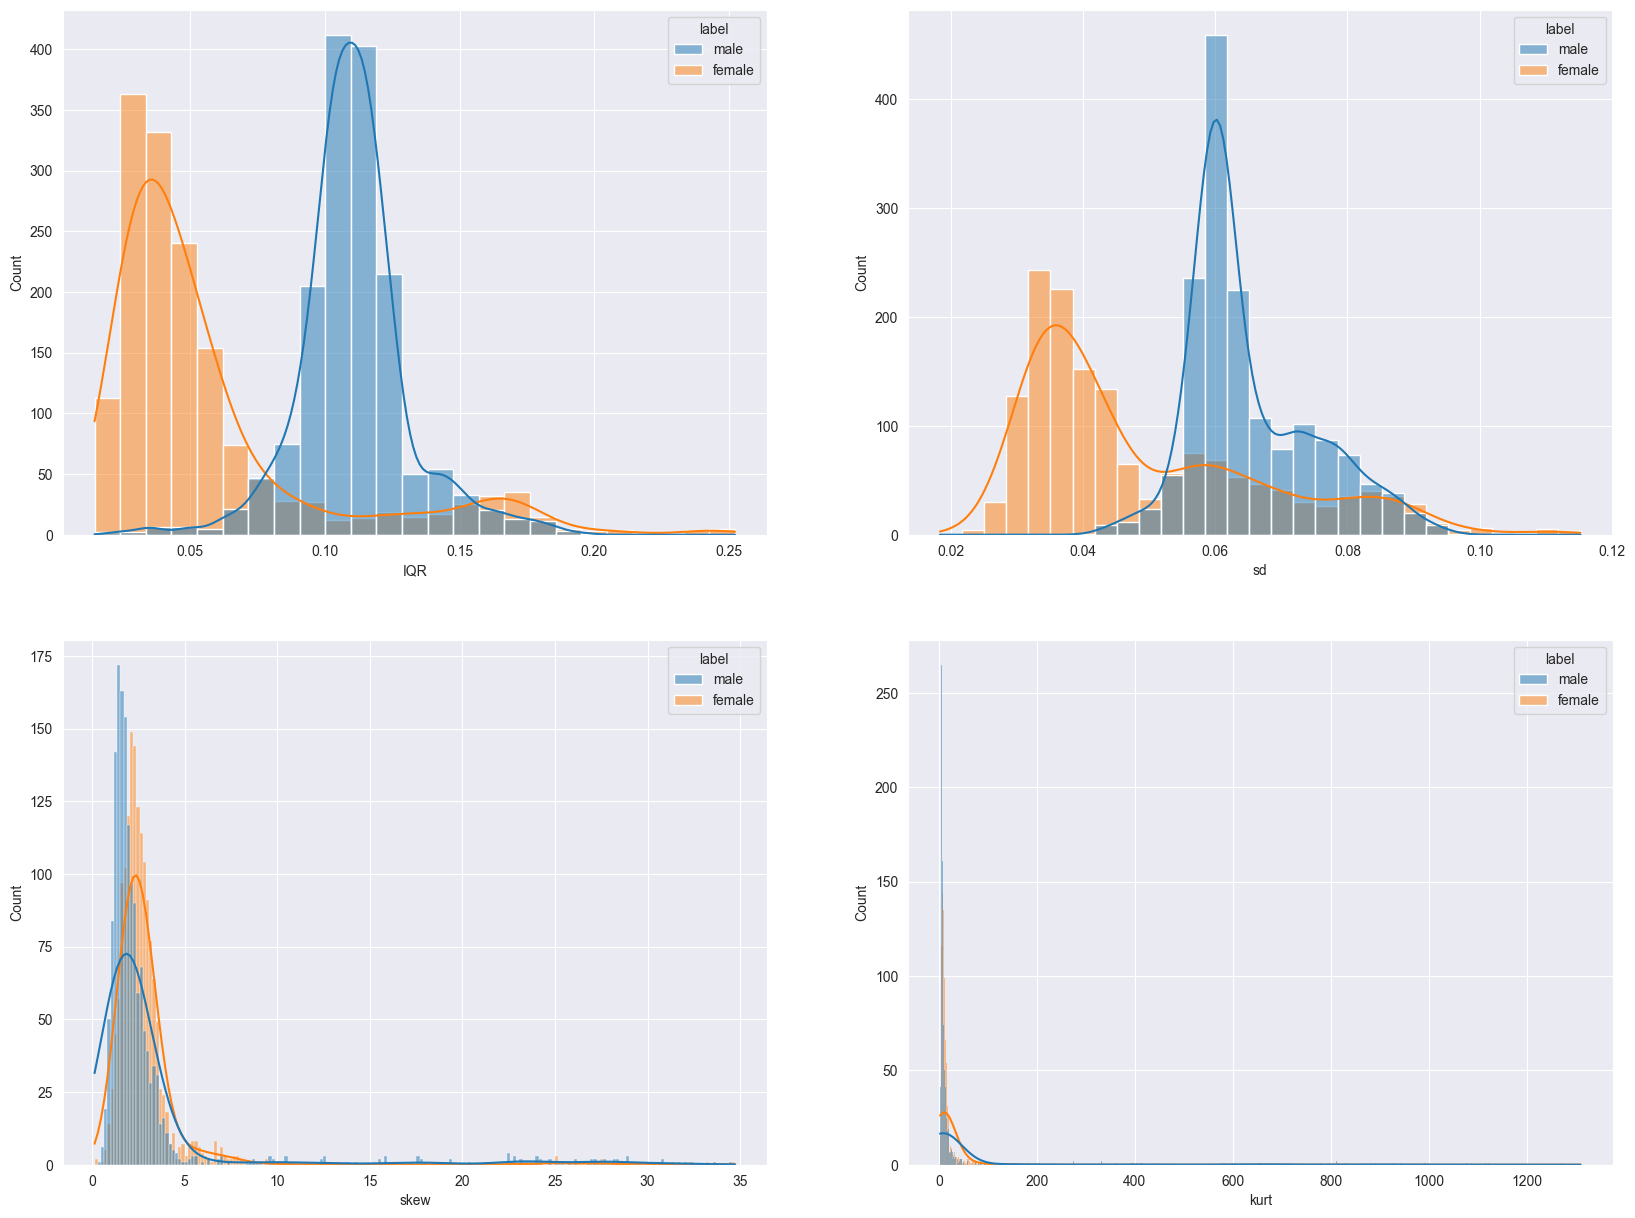

In [153]:
spread_cols = ['IQR', 'sd', 'skew', 'kurt']
f, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(spread_cols):
    sns.histplot(voice_data, x=col, ax=axes[i // 2, i % 2], kde=True, hue='label')

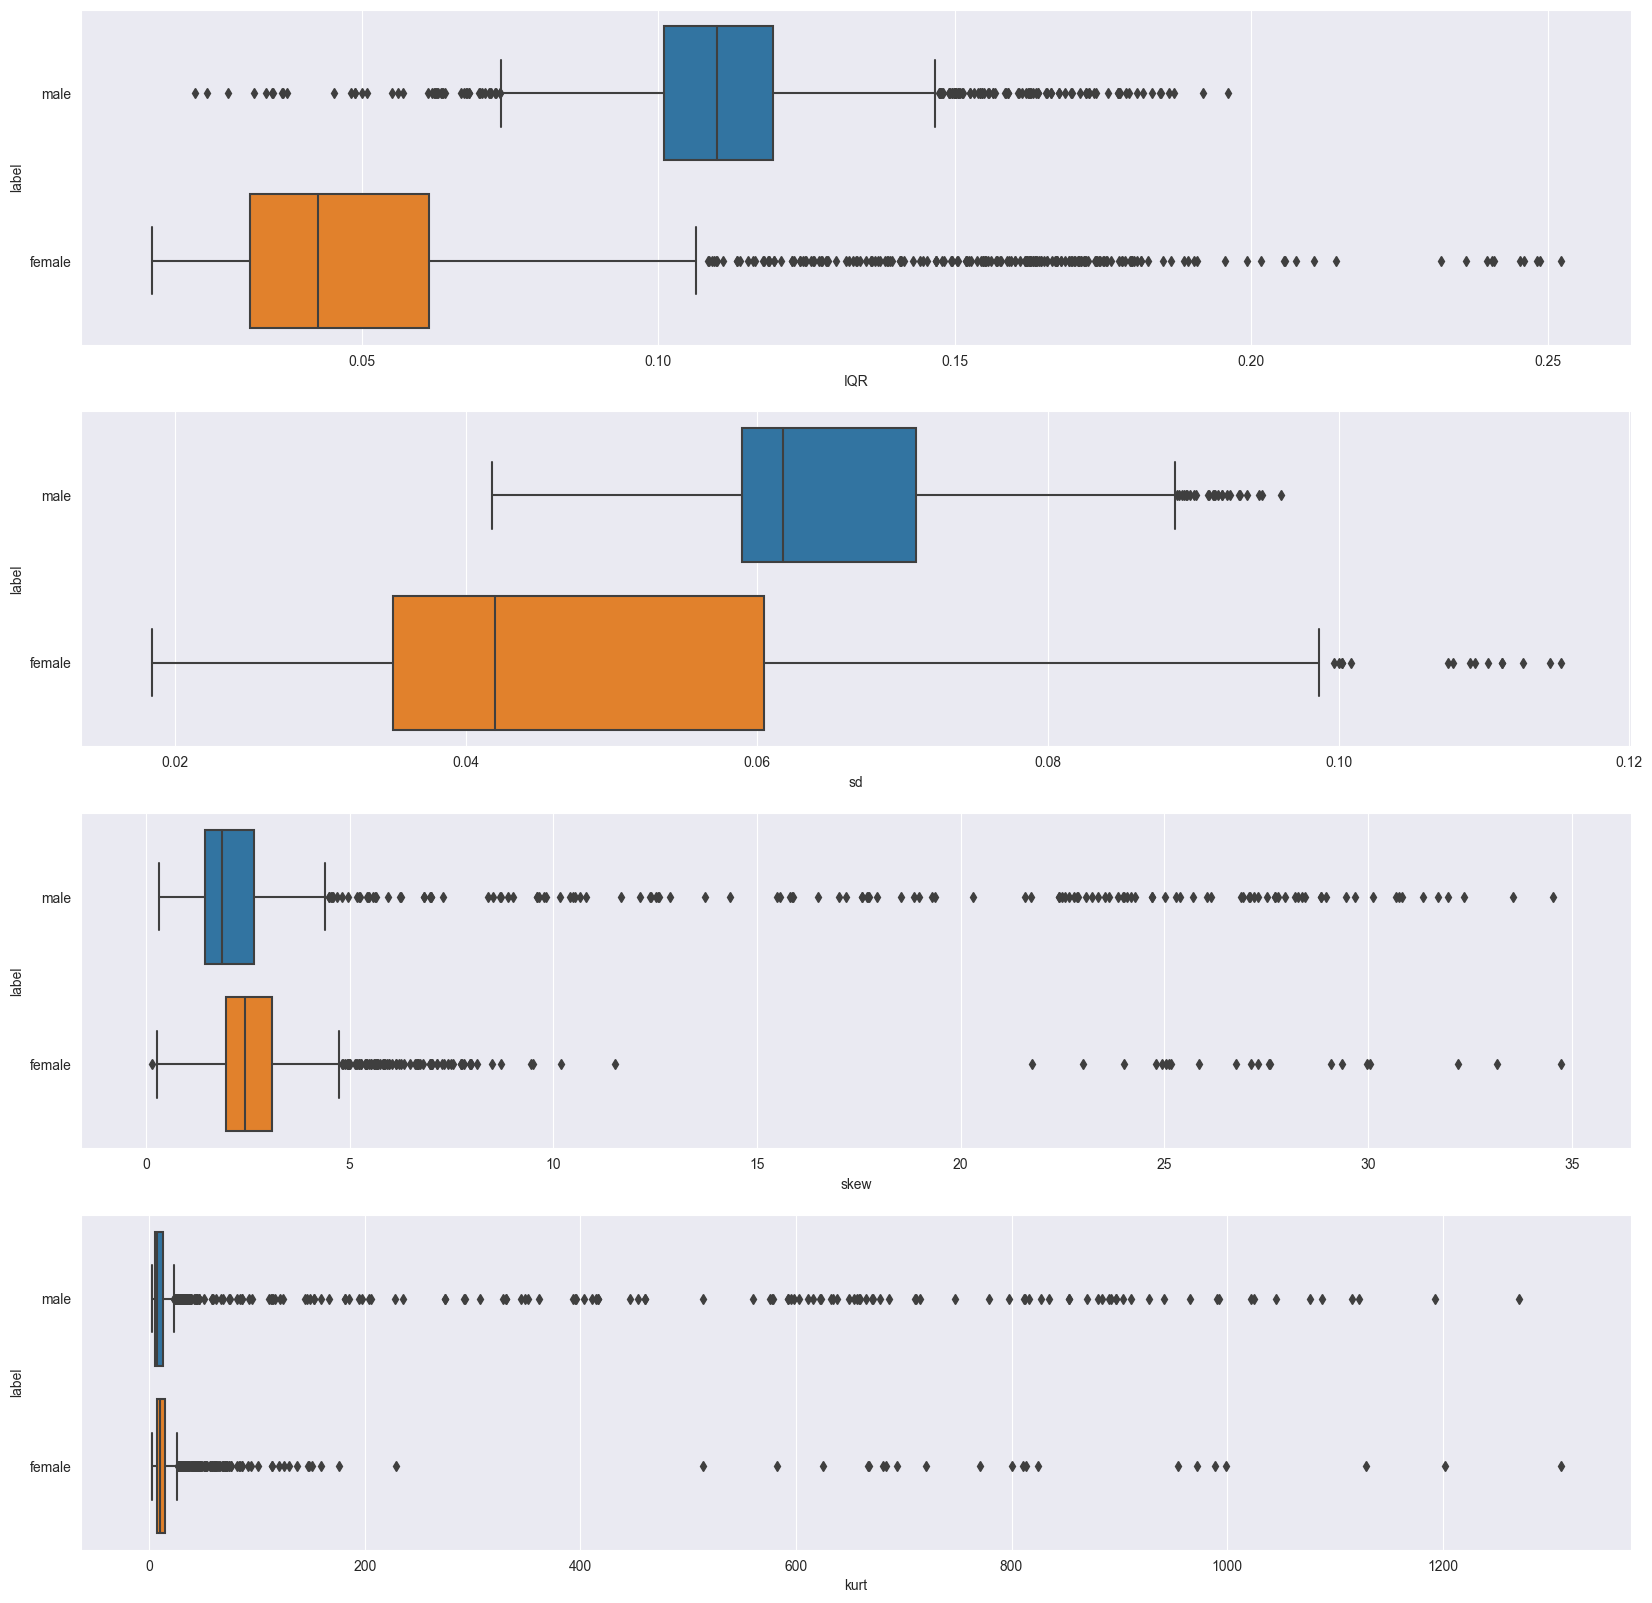

In [154]:
f, axes = plt.subplots(4, 1, figsize=(20, 20))
for i, col in enumerate(spread_cols):
    sns.boxplot(x=col, y='label', data=voice_data, ax=axes[i])

We found that `IQR` is higher for `male` than `female`. `sd` is higher for `male` than `female`.

However, we found that we could not see clearly the difference between `male` and `female` for `skew` and `kurt`. That's because most of the data is crammed into a small section, but very few are large. So, we need to use a logarithmic scale to see the difference.

In [155]:
log_skew = voice_data['skew'].map(lambda x: np.log(x + 1))
log_kurt = voice_data['kurt'].map(lambda x: np.log(x + 1))
voice_data['log_skew'] = log_skew
voice_data['log_kurt'] = log_kurt
voice_data.drop(['skew', 'kurt'], axis=1, inplace=True)
voice_data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'sp.ent', 'sfm',
       'mode', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'label', 'log_skew', 'log_kurt'],
      dtype='object')

<Axes: xlabel='log_kurt', ylabel='Count'>

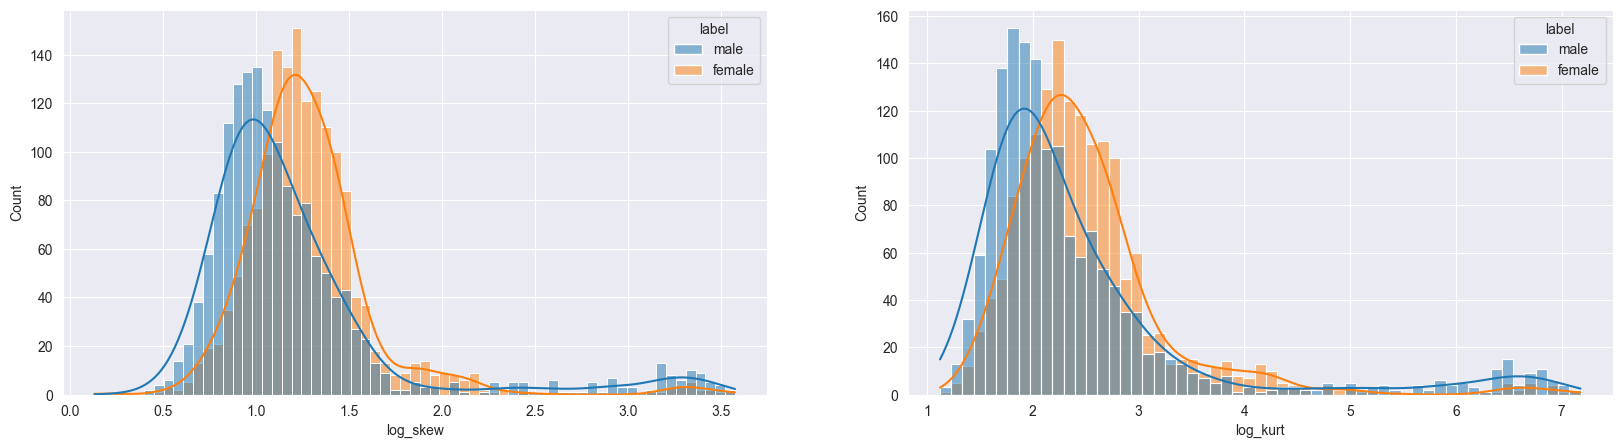

In [156]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(voice_data, x='log_skew', ax=axes[0], kde=True, hue='label')
sns.histplot(voice_data, x='log_kurt', ax=axes[1], kde=True, hue='label')

<Axes: xlabel='log_kurt', ylabel='label'>

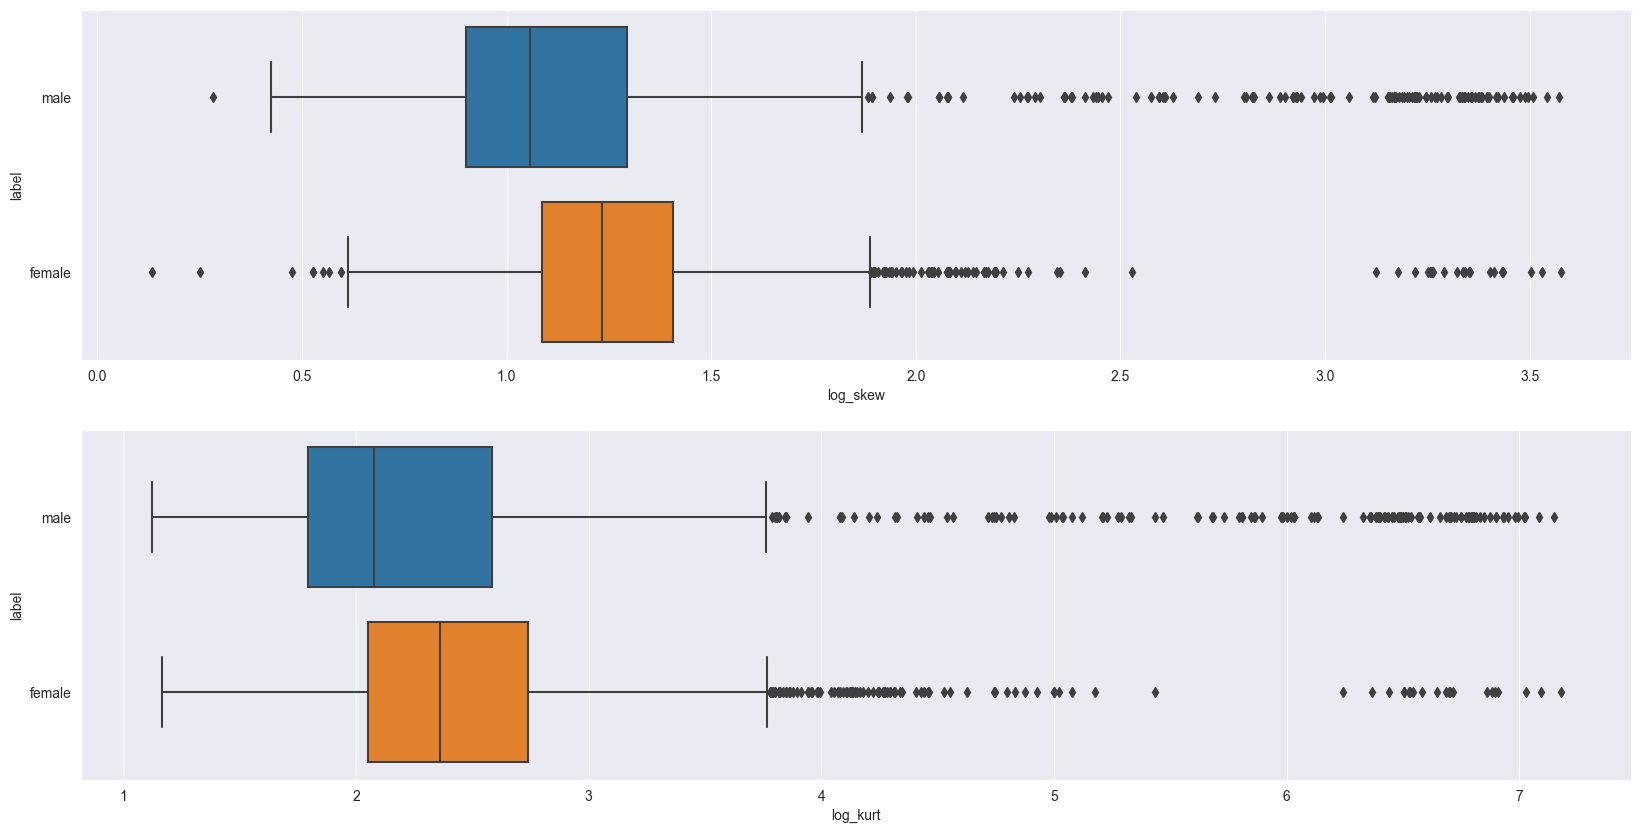

In [157]:
f, axes = plt.subplots(2, 1, figsize=(20, 10))
sns.boxplot(x='log_skew', y='label', data=voice_data, ax=axes[0])
sns.boxplot(x='log_kurt', y='label', data=voice_data, ax=axes[1])

We found that `log_skew` and `log_kurt` are slightly higher for `female` than `male`.

#### Comparison of the Spectral Features

The spectral features are measured by `sp.ent`, `sfm`, `mode`. Let's compare them with `label`.

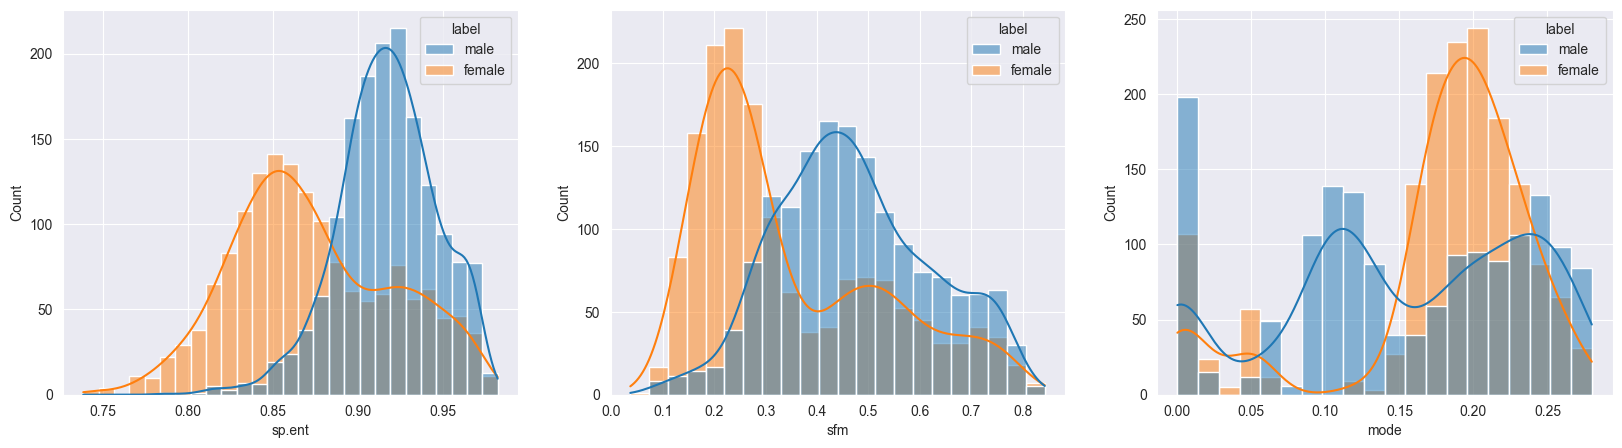

In [158]:
spectral_cols = ['sp.ent', 'sfm', 'mode']
f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, col in enumerate(spectral_cols):
    sns.histplot(voice_data, x=col, ax=axes[i], kde=True, hue='label')

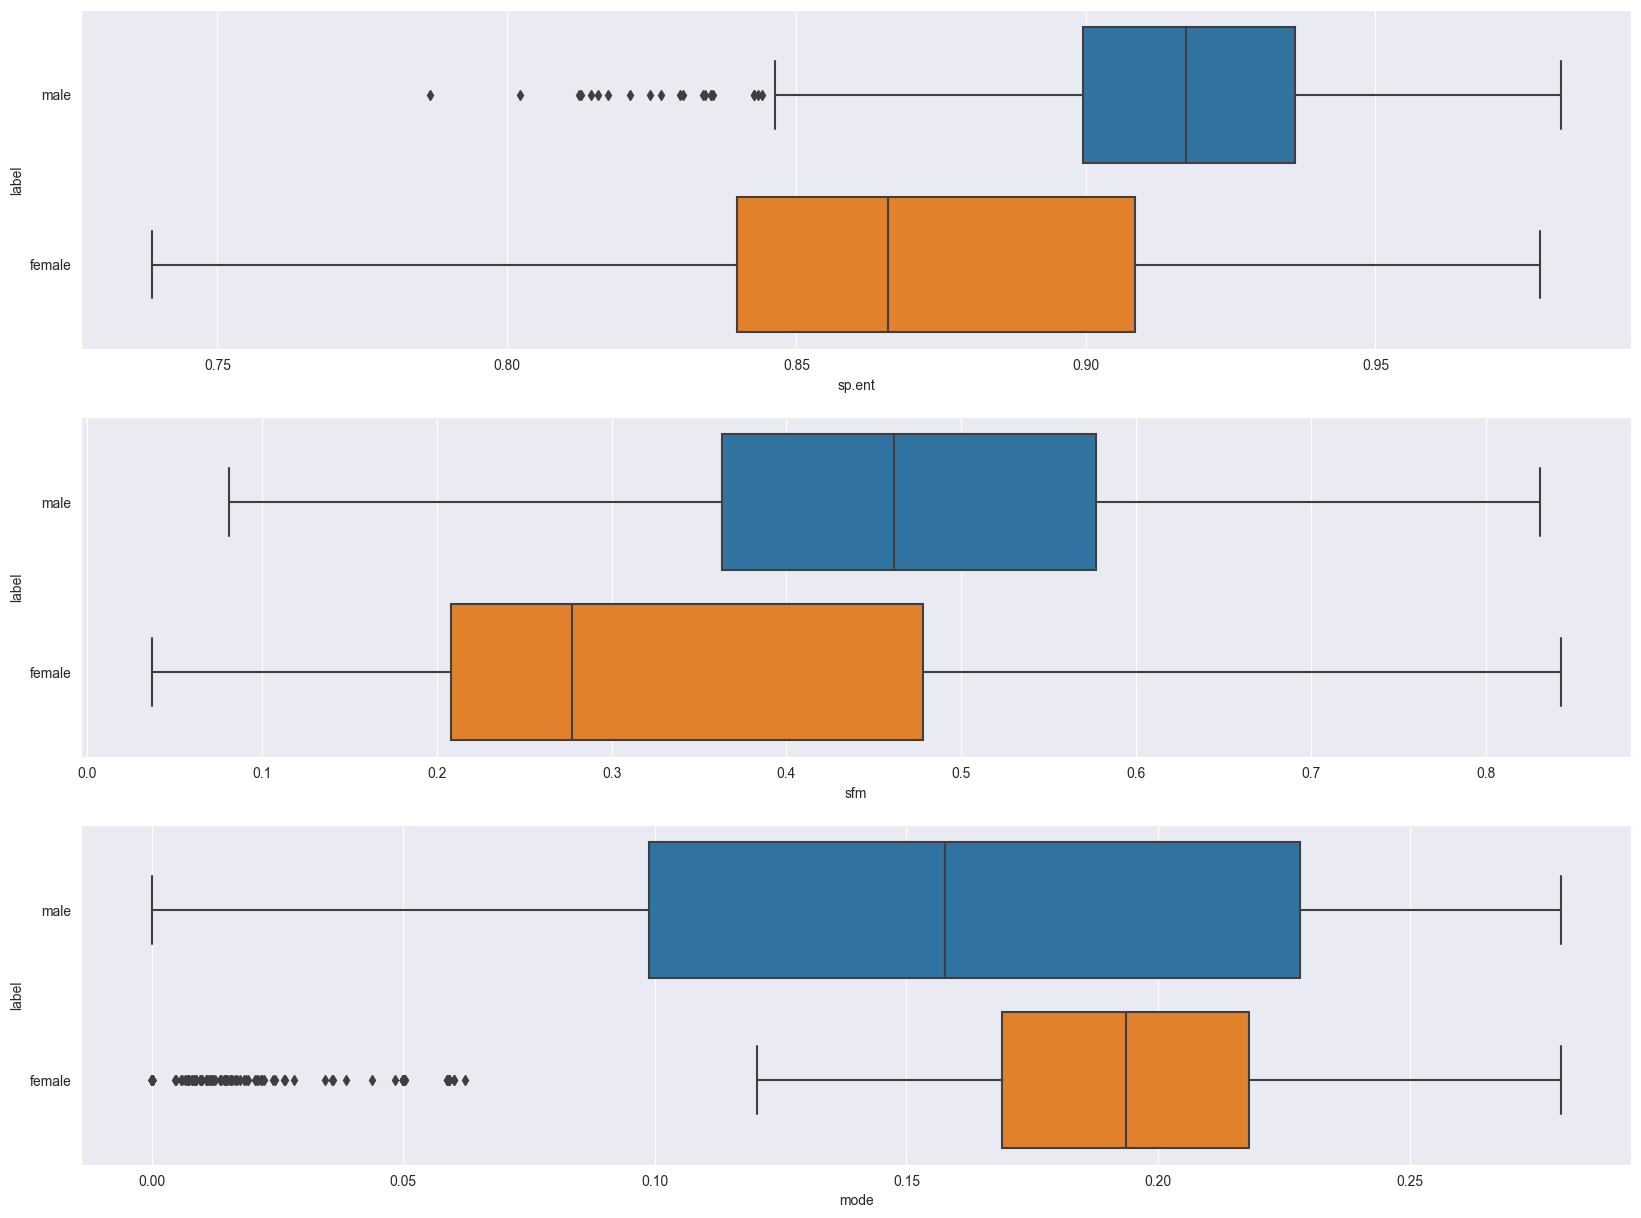

In [159]:
f, axes = plt.subplots(3, 1, figsize=(20, 15))
for i, col in enumerate(spectral_cols):
    sns.boxplot(x=col, y='label', data=voice_data, ax=axes[i])

For `sp.ent`, male is mostly highly than female. And for `sfm`, females seems much lower. For `mode`, female seems to be concentrated in the high-frequency region, while male is evenly distributed in various regions.

#### Comparison of the Fundamental Frequency Features

The fundamental frequency features are measured by `meanfun`, `minfun` and `maxfun` and `modindx`. Let's compare them with `label`.

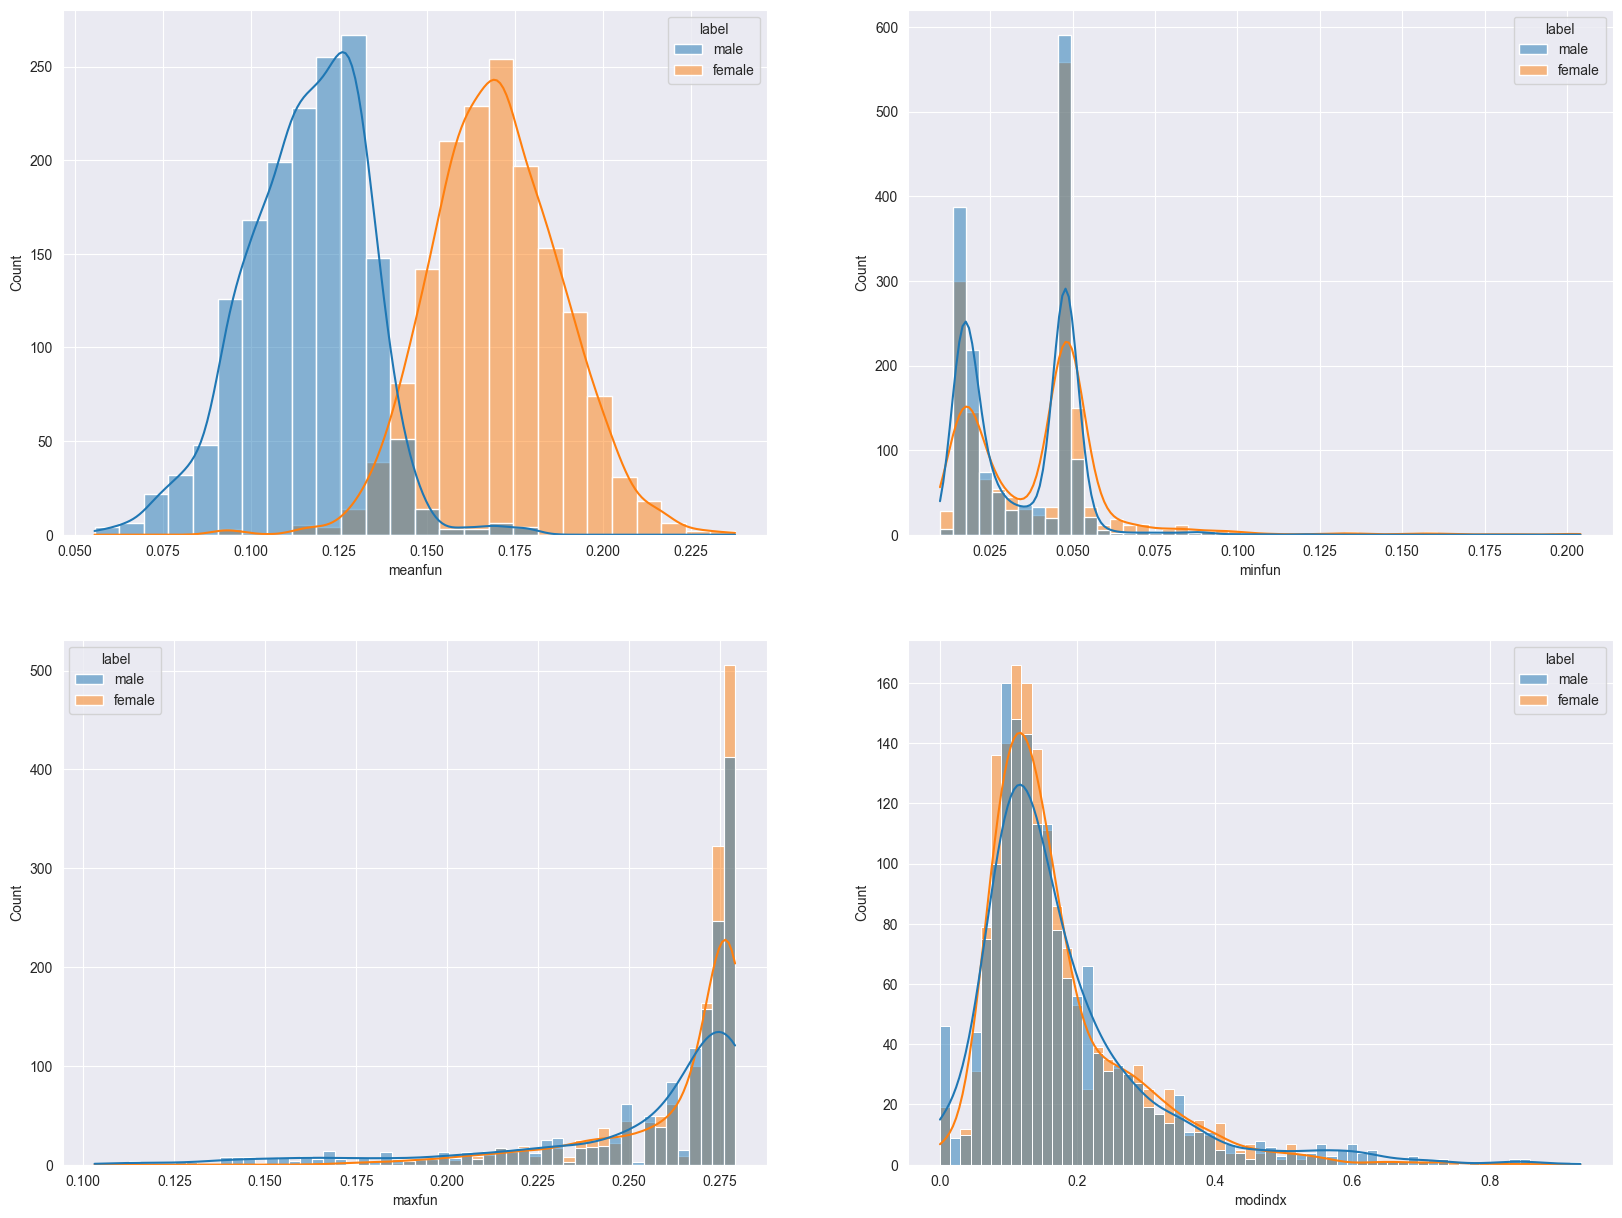

In [160]:
fundamental_cols = ['meanfun', 'minfun', 'maxfun', 'modindx']
f, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(fundamental_cols):
    sns.histplot(voice_data, x=col, ax=axes[i // 2, i % 2], kde=True, hue='label')

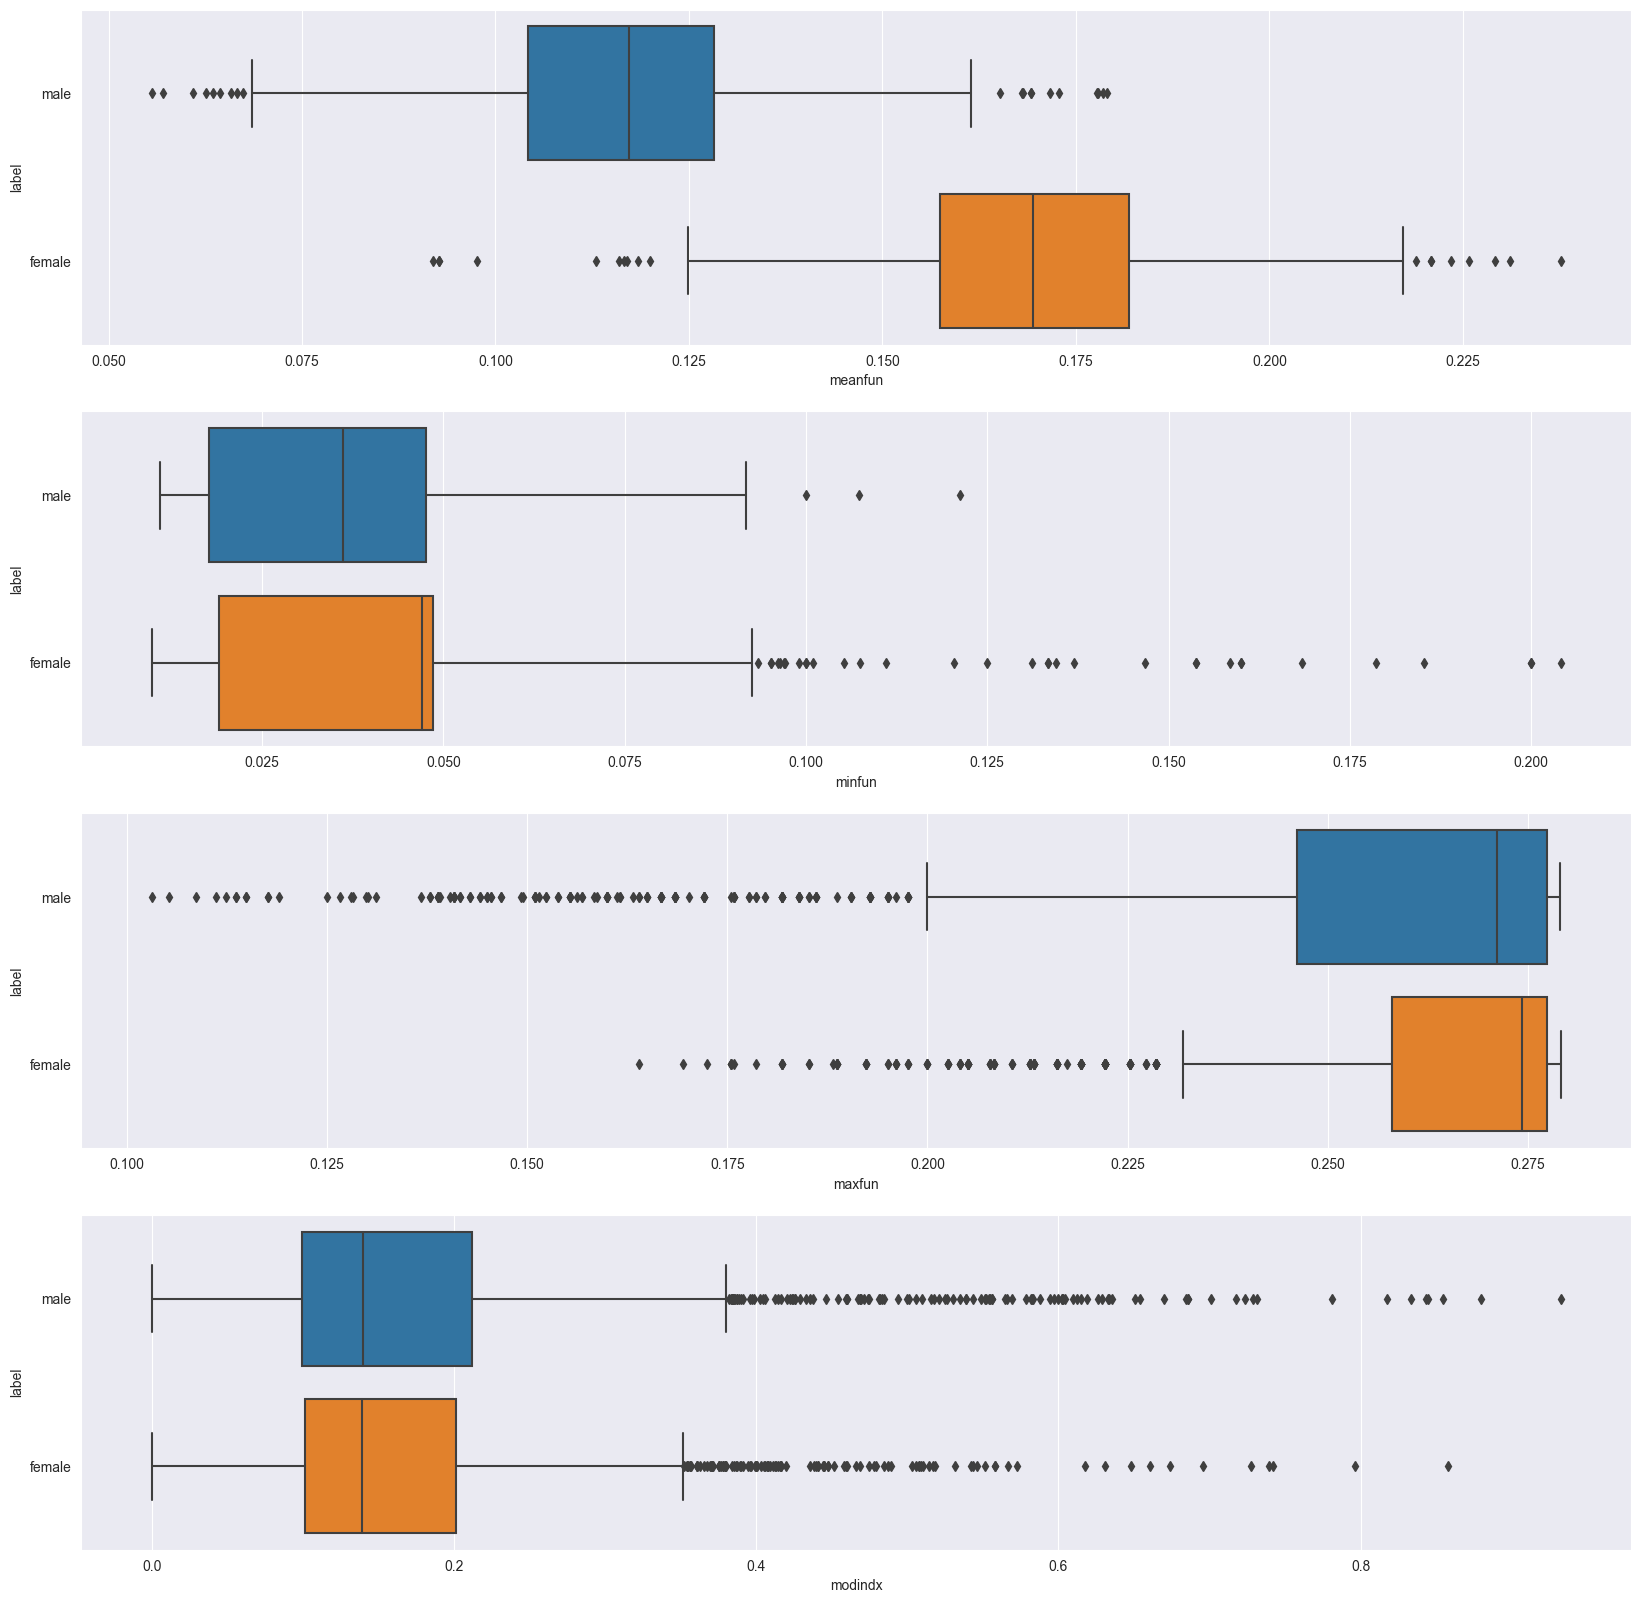

In [161]:
f, axes = plt.subplots(4, 1, figsize=(20, 20))
for i, col in enumerate(fundamental_cols):
    sns.boxplot(x=col, y='label', data=voice_data, ax=axes[i])

We found that `meanfun` is higher for `male` than `female`, and `modindex` are almost the same for both `male` and `female`.

However, `minfun` are mostly concentrated in the low-frequency region, while `maxfun` are mostly concentrated in the high-frequency region. So, we need to use a logarithmic scale to see the difference.

So, we need to use a logarithmic scale and a exponential scale to see the difference.

In [162]:
log_minfun = voice_data['minfun'].map(lambda x: np.log(x))
exp_maxfun = voice_data['maxfun'].map(lambda x: np.exp(10 * x))
voice_data['log_minfun'] = log_minfun
voice_data['exp_maxfun'] = exp_maxfun
voice_data.drop(['minfun', 'maxfun'], axis=1, inplace=True)

<Axes: xlabel='exp_maxfun', ylabel='Count'>

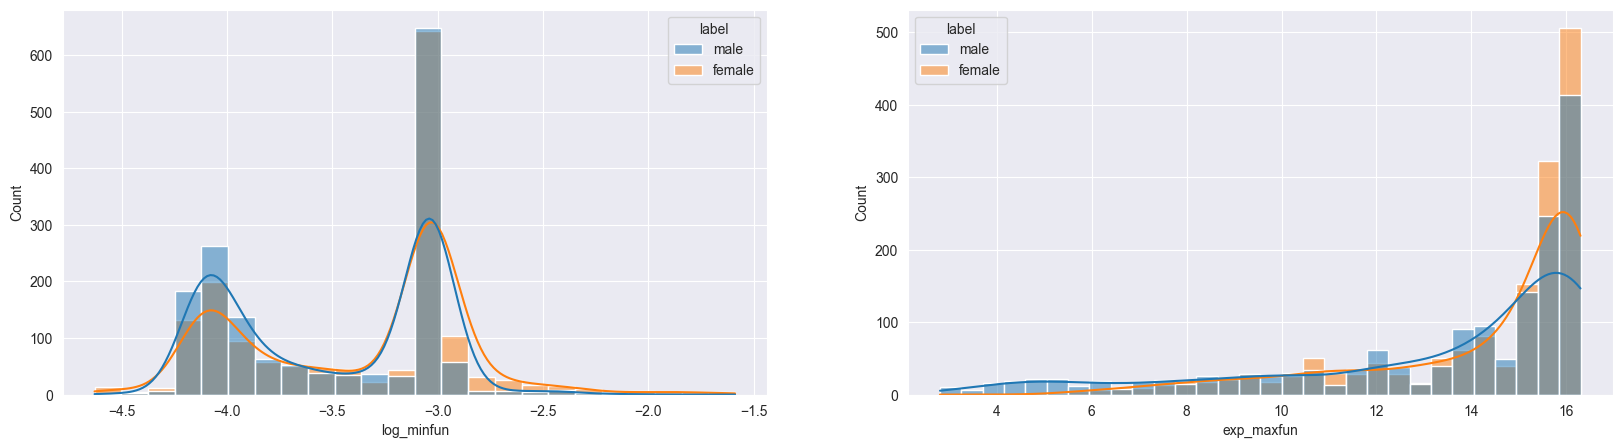

In [163]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(voice_data, x='log_minfun', ax=axes[0], kde=True, hue='label')
sns.histplot(voice_data, x='exp_maxfun', ax=axes[1], kde=True, hue='label')

<Axes: xlabel='exp_maxfun', ylabel='label'>

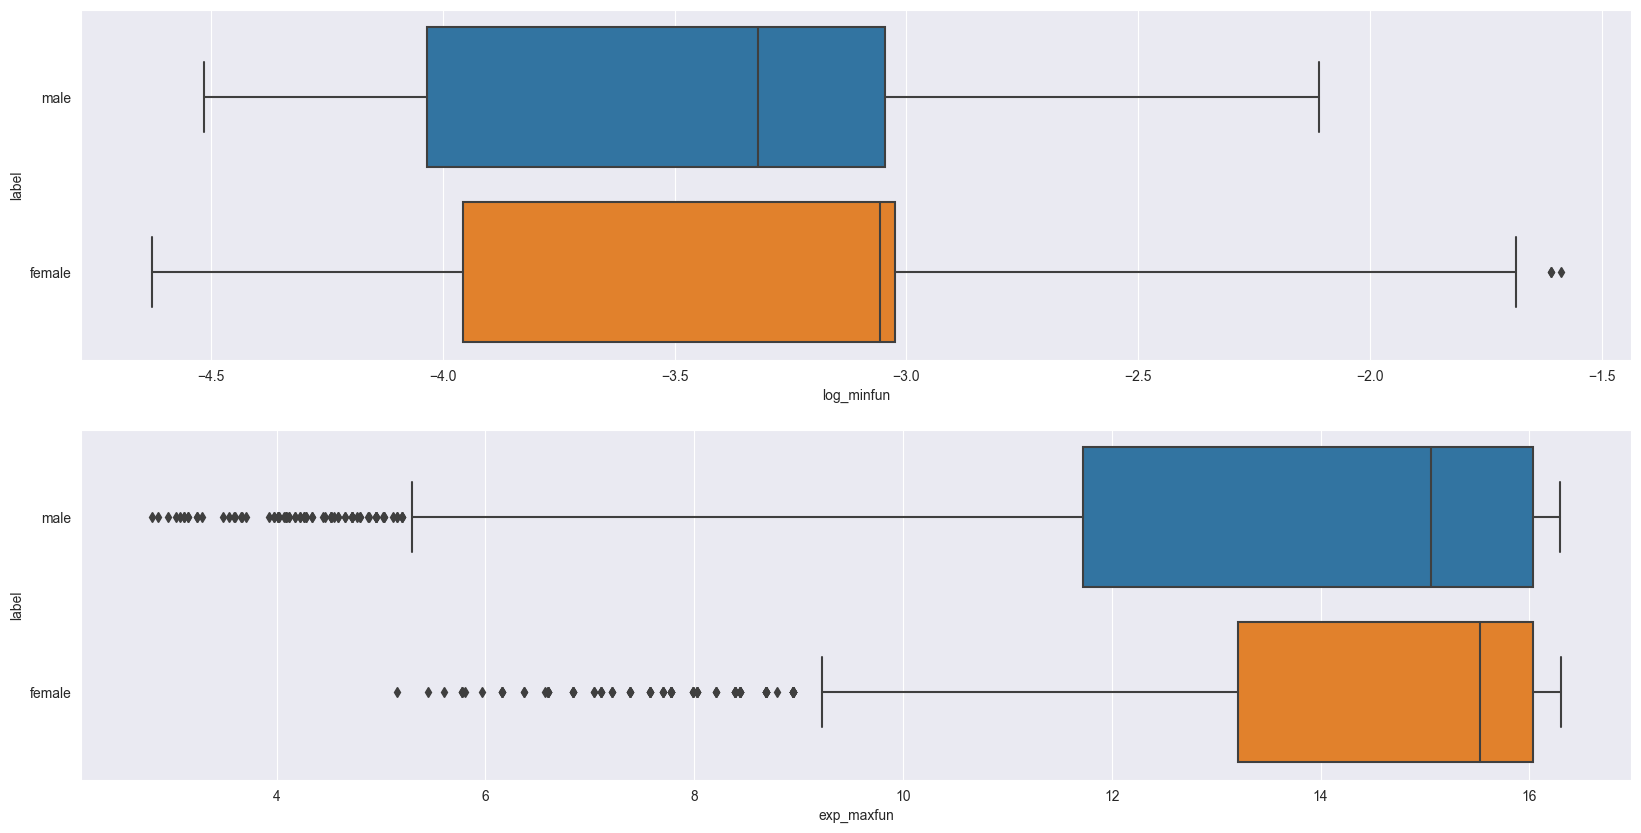

In [164]:
f, axes = plt.subplots(2, 1, figsize=(20, 10))
sns.boxplot(x='log_minfun', y='label', data=voice_data, ax=axes[0])
sns.boxplot(x='exp_maxfun', y='label', data=voice_data, ax=axes[1])

We found that `log_minfun` and `exp_maxfun` are almost the same for both `male` and `female`.

#### Comparison of the Dominant Frequency Features

The dominant frequency features are measured by `meandom`, `mindom`, `maxdom` and `dfrange`. Let's compare them with `label`.

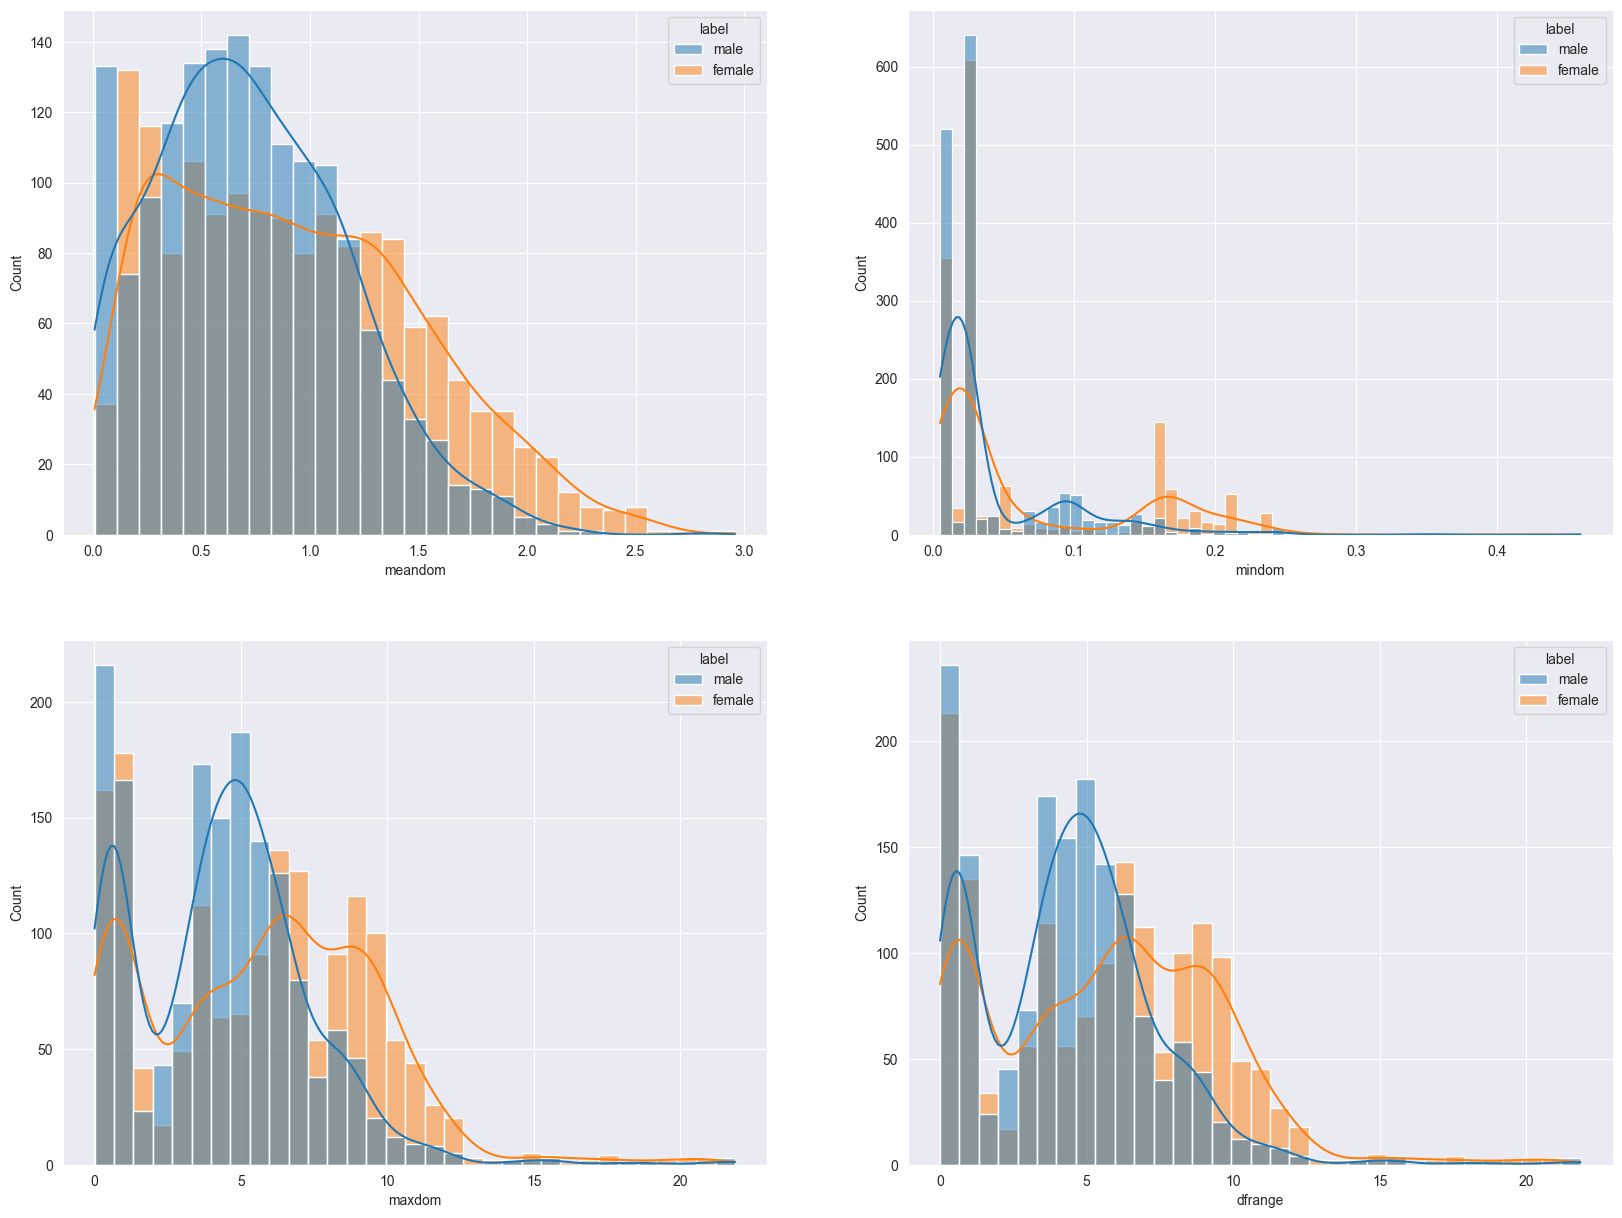

In [165]:
dominant_cols = ['meandom', 'mindom', 'maxdom', 'dfrange']
f, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(dominant_cols):
    sns.histplot(voice_data, x=col, ax=axes[i // 2, i % 2], kde=True, hue='label')

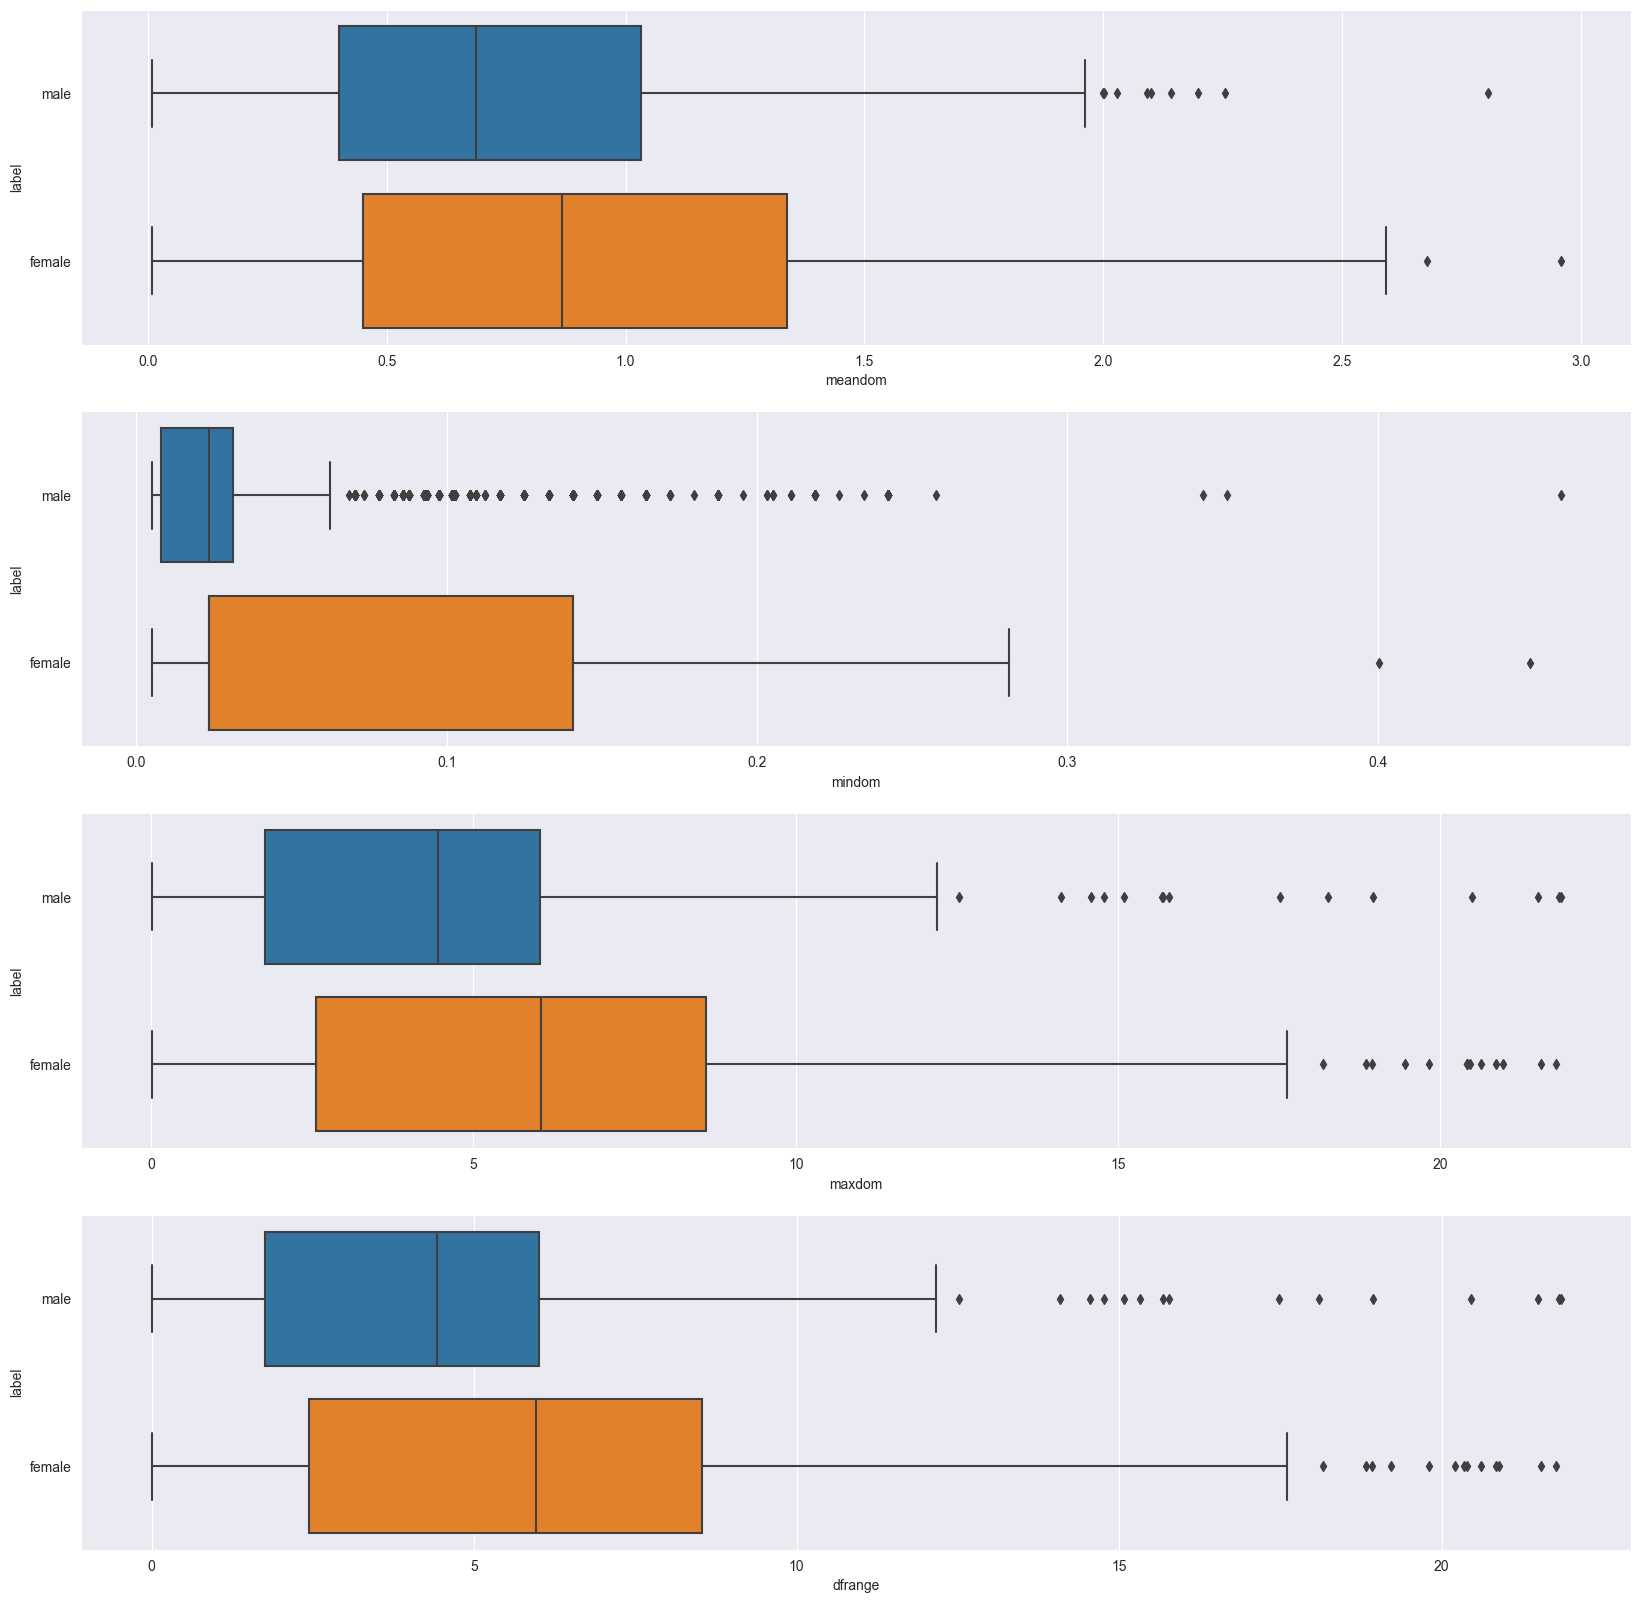

In [166]:
f, axes = plt.subplots(4, 1, figsize=(20, 20))
for i, col in enumerate(dominant_cols):
    sns.boxplot(x=col, y='label', data=voice_data, ax=axes[i], orient='h')

It is a little hard to use language to describe the difference. Maybe this part we could use a more flexible way for classification.

### Correlation between variables

In our intuition, `meanfreq`, `median`, `Q25` and `Q75` should be highly correlated. Let's check it out.

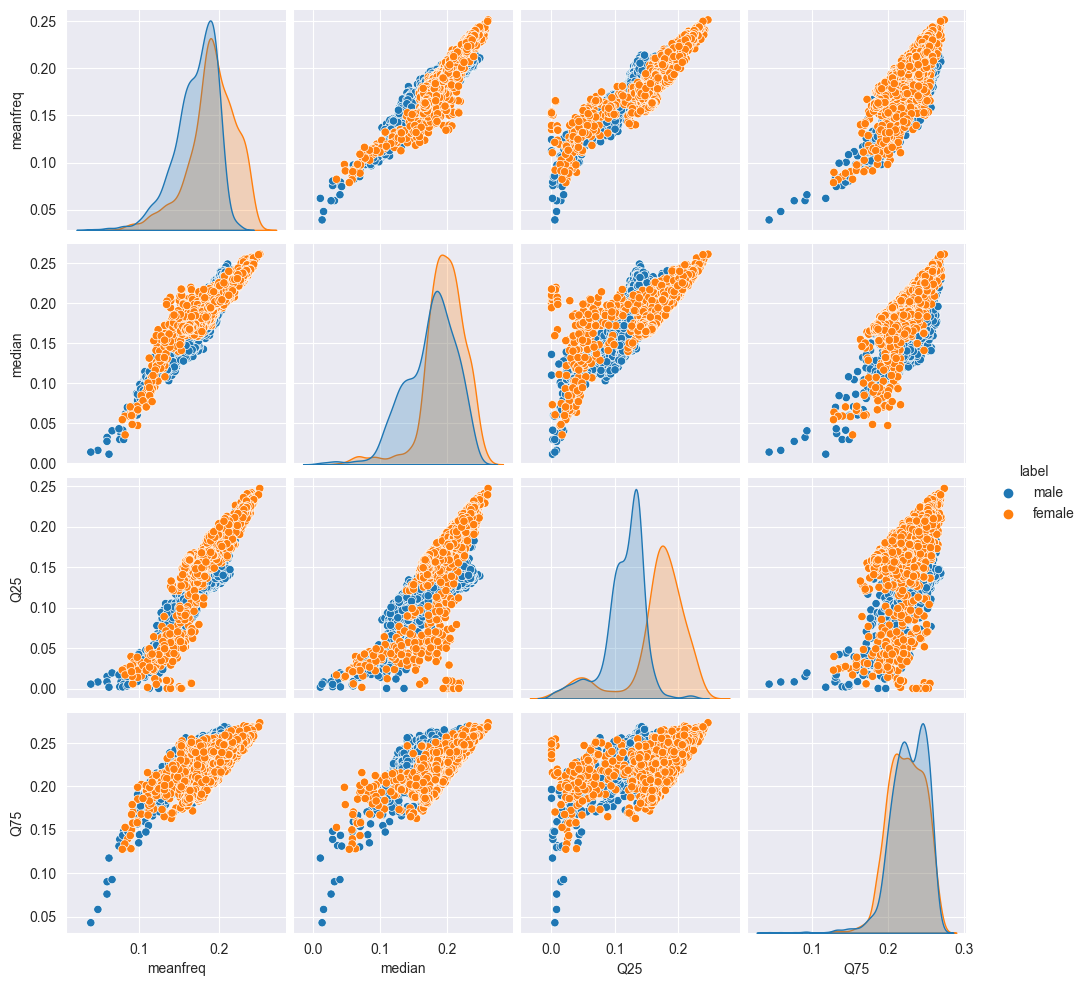

In [167]:
distribution_cols = ['meanfreq', 'median', 'Q25', 'Q75']
sns.pairplot(voice_data, vars=distribution_cols, hue="label")

<Axes: >

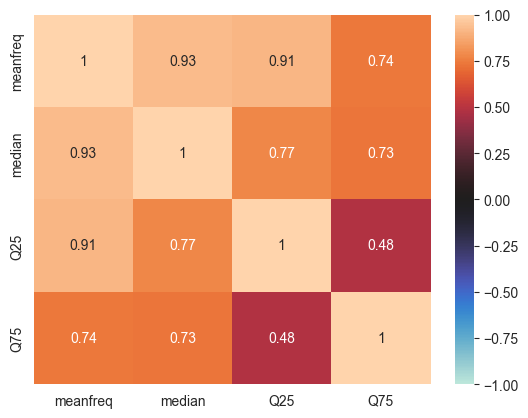

In [168]:
sns.heatmap(voice_data[distribution_cols].corr(), annot=True, vmin=-1, vmax=1, center=0)

We found that `meanfreq` is highly correlated with `median` and `Q75`, but `Q25` is slightly independent of the other three variables.

## Save the Data

Firstly, we rearrange the columns to make it easier to read.

In [169]:
voice_data = voice_data[
    ['meanfreq', 'median', 'Q25', 'Q75',
     'IQR', 'sd', 'log_skew', 'log_kurt',
     'sp.ent', 'sfm', 'mode',
     'meanfun', 'log_minfun', 'exp_maxfun', 'modindx',
     'meandom', 'mindom', 'maxdom', 'dfrange',
     'label']]
voice_data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,0.059781,0.032027,0.015071,0.090193,0.075122,0.064241,2.629257,5.618235,0.893369,0.491918,0.000000,0.084279,-4.153988,15.778065,0.000000,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.040229,0.019414,0.092666,0.073252,0.067310,3.153731,6.454591,0.892193,0.513724,0.000000,0.107937,-4.146106,12.182494,0.052632,0.009014,0.007812,0.054688,0.046875,male
2,0.077316,0.036718,0.008701,0.131908,0.123207,0.083829,3.458118,6.933353,0.846389,0.478905,0.000000,0.098706,-4.156928,15.057322,0.046512,0.007990,0.007812,0.015625,0.007812,male
3,0.151228,0.158011,0.096582,0.207955,0.111374,0.072111,0.803270,1.644283,0.963322,0.727232,0.083878,0.088965,-4.028694,12.182494,0.247119,0.201497,0.007812,0.562500,0.554688,male
4,0.135120,0.124656,0.078720,0.206045,0.127325,0.079146,0.742496,1.674048,0.971955,0.783568,0.104261,0.106398,-4.078596,14.391916,0.208274,0.712812,0.007812,5.484375,5.476562,male


Then, we save the data as an Excel file.

In [170]:
voice_data.to_csv('data/cleaned/voice_data.csv', index=False)

### Train and Test Split

In [171]:
from sklearn.model_selection import train_test_split

X = voice_data.drop('label', axis=1)
y = voice_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.to_csv('data/cleaned/X_train.csv', index=False)
X_test.to_csv('data/cleaned/X_test.csv', index=False)
y_train.to_csv('data/cleaned/y_train.csv', index=False)
y_test.to_csv('data/cleaned/y_test.csv', index=False)

In [172]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2534, 19)
X_test shape: (634, 19)
y_train shape: (2534,)
y_test shape: (634,)


## Reference

* [Data Set from Kaggle](https://www.kaggle.com/datasets/primaryobjects/voicegender)
* [`seeware` R package document](https://cran.r-project.org/web/packages/seewave/seewave.pdf)
* [`WarbleR` R package document](https://cran.r-project.org/web/packages/warbleR/warbleR.pdf)